In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error , root_mean_squared_error , r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Reading the data
air_data = pd.read_csv(r'Airbnb.csv')
pd.set_option('display.max_columns' , None)
air_data.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [3]:
## checking for basic statistics and data information
air_data.info()
print('*****************_____________________********************')
air_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.872300e+04,18723.0,1.872300e+04,0.0,0.0,18723.000000,18723.000000,18723.000000,18723.000000,0.0,18723.000000,0.0,18723.000000,18723.000000
mean,1.120568e+07,1476.0,3.577612e+07,NaN,NaN,16.741548,3.301127,2.922021,1.430380,NaN,166.599477,NaN,52.365261,4.888585
std,6.082192e+06,0.0,3.758103e+07,NaN,NaN,33.522630,2.213558,1.327524,0.879019,NaN,108.943849,NaN,0.015142,0.034537
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,6.050608e+06,1476.0,7.140879e+06,NaN,NaN,2.000000,0.000000,2.000000,1.000000,NaN,108.000000,NaN,52.355254,4.864344
50%,1.228287e+07,1476.0,1.988641e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364628,4.885994
75%,1.661084e+07,1476.0,5.202680e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,192.000000,NaN,52.374797,4.907480
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


In [4]:
# Extracting the necessary data from the given time stamp such as day hour  minute date 
air_data['day'] = pd.to_datetime(air_data['last_modified'], format='%Y-%m-%d %H:%M:%S.%f').dt.day
air_data['hour'] = pd.to_datetime(air_data['last_modified'], format='%Y-%m-%d %H:%M:%S.%f').dt.hour
air_data['minute'] = pd.to_datetime(air_data['last_modified'], format='%Y-%m-%d %H:%M:%S.%f').dt.minute

In [5]:
# checking for the null values in the data 
null_col = [feature for feature in air_data if air_data[feature].isnull().sum() > 0]
for feature in null_col:
    print('{}--->>{} missing values'.format(feature,air_data[feature].isnull().sum()))

country--->>18723 missing values
borough--->>18723 missing values
bathrooms--->>18723 missing values
minstay--->>18723 missing values
name--->>52 missing values


In [6]:
# dropping the null columns
air_data.drop( columns = null_col , inplace = True)
# dropping the unnecessary columns which will not be usefull
air_data.drop(air_data[['room_id', 'survey_id' , 'host_id' , 'city' , 'location', 'last_modified']] , axis = 1 , inplace = True)

In [7]:
air_data

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,day,hour,minute
0,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,52.356209,4.887491,23,13,6
1,Shared room,Centrum West,45,4.5,4,1.0,126.0,52.378518,4.896120,23,13,6
2,Shared room,Watergraafsmeer,1,0.0,3,1.0,132.0,52.338811,4.943592,23,13,6
3,Shared room,Centrum West,7,5.0,4,1.0,121.0,52.376319,4.890028,23,13,6
4,Shared room,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,52.370384,4.852873,23,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...
18718,Private room,Bijlmer Centrum,10,5.0,3,1.0,32.0,52.319794,4.955638,22,16,5
18719,Private room,Bijlmer Centrum,6,5.0,4,1.0,24.0,52.319080,4.954822,22,16,5
18720,Private room,Geuzenveld / Slotermeer,0,0.0,1,1.0,38.0,52.384028,4.838403,22,16,5
18721,Private room,Centrum West,13,4.5,2,1.0,36.0,52.372120,4.890982,22,16,5


In [8]:
# Sample neighborhood data with corresponding latitude and longitude
# This are the latitude and the longitude of the neighboorhood which were taken form google
neighborhood_data = {
    'Neig': [
        'De Pijp / Rivierenbuurt', 'Centrum West', 'Watergraafsmeer',
        'De Baarsjes / Oud West', 'Oostelijk Havengebied / Indische Buurt',
        'Westerpark', 'Oud Oost', 'Centrum Oost',
        'Geuzenveld / Slotermeer', 'Buitenveldert / Zuidas', 'Oud Noord',
        'Bos en Lommer', 'Slotervaart', 'Bijlmer Centrum',
        'Ijburg / Eiland Zeeburg', 'Noord-West / Noord-Midden',
        'De Aker / Nieuw Sloten', 'Noord West', 'Bijlmer Oost', 'Osdorp',
        'Noord Oost', 'Gaasperdam / Driemond', 'Westpoort'
    ],
    'neig_lat': [
        52.3538, 52.3762, 52.3472, 52.3685, 52.3664,     
        52.3867, 52.3596, 52.3733, 52.3662, 52.3300,
        52.3974, 52.3817, 52.3445, 52.3074, 52.3690,
        52.4010, 52.3432, 52.4012, 52.3132, 52.3523,
        52.3604, 52.3073, 52.4072
    ],
    'neig_long': [
        4.8950, 4.8657, 4.9517, 4.8559, 4.9468,
        4.8742, 4.9332, 4.9290, 4.8121, 4.8857,
        4.9252, 4.8573, 4.8108, 4.9415, 5.0232,
        4.8820, 4.7975, 4.8353, 4.9387, 4.8202,
        4.9887, 4.9522, 4.8050
    ]
}

# Create a DataFrame from the neighborhood data
neighborhoods_df = pd.DataFrame(neighborhood_data)


# Merge the neighborhoods_df with your existing df to add Latitude and Longitude
air_data = air_data.merge(neighborhoods_df, how='left', left_on='neighborhood', right_on='Neig')

# Drop the extra 'Neighborhood' column from the merged DataFrame if needed
air_data.drop(columns=['Neig'], inplace=True)

# Display the updated DataFrame with the new Latitude and Longitude columns
air_data


,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,day,hour,minute,neig_lat,neig_long
0,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,52.356209,4.887491,23,13,6,52.3538,4.8950
1,Shared room,Centrum West,45,4.5,4,1.0,126.0,52.378518,4.896120,23,13,6,52.3762,4.8657
2,Shared room,Watergraafsmeer,1,0.0,3,1.0,132.0,52.338811,4.943592,23,13,6,52.3472,4.9517
3,Shared room,Centrum West,7,5.0,4,1.0,121.0,52.376319,4.890028,23,13,6,52.3762,4.8657
4,Shared room,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,52.370384,4.852873,23,13,6,52.3685,4.8559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,Private room,Bijlmer Centrum,10,5.0,3,1.0,32.0,52.319794,4.955638,22,16,5,52.3074,4.9415
18719,Private room,Bijlmer Centrum,6,5.0,4,1.0,24.0,52.319080,4.954822,22,16,5,52.3074,4.9415
18720,Private room,Geuzenveld / Slotermeer,0,0.0,1,1.0,38.0,52.384028,4.838403,22,16,5,52.3662,4.8121
18721,Private room,Centrum West,13,4.5,2,1.0,36.0,52.372120,4.890982,22,16,5,52.3762,4.8657


In [9]:
## defining the haversine method to find the distance between the neighorhood location and room/apartment
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

# Calculate distances for each row in the DataFrame
air_data['distance_to_neighborhood'] = air_data.apply(lambda row: haversine(row['neig_lat'], 
                                                              row['neig_long'], 
                                                                 row['latitude'], 
                                                                row['longitude']), axis=1)

air_data

,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,day,hour,minute,neig_lat,neig_long,distance_to_neighborhood
0,Shared room,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,52.356209,4.887491,23,13,6,52.3538,4.8950,0.576039
1,Shared room,Centrum West,45,4.5,4,1.0,126.0,52.378518,4.896120,23,13,6,52.3762,4.8657,2.080930
2,Shared room,Watergraafsmeer,1,0.0,3,1.0,132.0,52.338811,4.943592,23,13,6,52.3472,4.9517,1.083292
3,Shared room,Centrum West,7,5.0,4,1.0,121.0,52.376319,4.890028,23,13,6,52.3762,4.8657,1.651475
4,Shared room,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,52.370384,4.852873,23,13,6,52.3685,4.8559,0.293463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,Private room,Bijlmer Centrum,10,5.0,3,1.0,32.0,52.319794,4.955638,22,16,5,52.3074,4.9415,1.680165
18719,Private room,Bijlmer Centrum,6,5.0,4,1.0,24.0,52.319080,4.954822,22,16,5,52.3074,4.9415,1.583318
18720,Private room,Geuzenveld / Slotermeer,0,0.0,1,1.0,38.0,52.384028,4.838403,22,16,5,52.3662,4.8121,2.667954
18721,Private room,Centrum West,13,4.5,2,1.0,36.0,52.372120,4.890982,22,16,5,52.3762,4.8657,1.775212


In [10]:
air_data.drop(columns = ['neig_lat' , 'neig_long','latitude','longitude'] , inplace = True)

In [11]:
neighborhood_mapping = {
    'De Baarsjes / Oud West': 0,
    'De Pijp / Rivierenbuurt': 1,
    'Centrum West': 2,
    'Centrum Oost': 3,
    'Westerpark': 4,
    'Noord-West / Noord-Midden': 5,
    'Oud Oost': 6,
    'Bos en Lommer': 7,
    'Oostelijk Havengebied / Indische Buurt': 8,
    'Watergraafsmeer': 9,
    'Oud Noord': 10,
    'Ijburg / Eiland Zeeburg': 11,
    'Slotervaart': 12,
    'Buitenveldert / Zuidas': 13,
    'Noord West': 14,
    'Noord Oost': 15,
    'Geuzenveld / Slotermeer': 16,
    'Osdorp': 17,
    'De Aker / Nieuw Sloten': 18,
    'Bijlmer Centrum': 19,
    'Bijlmer Oost': 20,
    'Gaasperdam / Driemond': 21,
    'Westpoort': 22
}

# Map neighborhoods to numbers
air_data['neighborhood'] = air_data['neighborhood'].map(neighborhood_mapping)

In [12]:
numeric_col = air_data.select_dtypes(include = ['number'])
Q1 = numeric_col.quantile(0.25)
Q3 = numeric_col.quantile(0.75)
IQR = Q3 - Q1
air_data_outliers = numeric_col[((numeric_col < (Q1 - 1.5 * IQR)) | (numeric_col > (Q3 + 1.5 * IQR)))]

In [13]:
air_data_outliers.count()

neighborhood                 530
reviews                     1839
overall_satisfaction           0
accommodates                 169
bedrooms                     568
price                       1032
day                            0
hour                           0
minute                         0
distance_to_neighborhood    1892
dtype: int64

In [14]:
skewness = numeric_col.skew()
skewness

neighborhood                 1.268708
reviews                      5.502787
overall_satisfaction        -0.792702
accommodates                 2.388798
bedrooms                     1.601304
price                       12.768987
day                          1.044233
hour                        -0.795312
minute                       0.192475
distance_to_neighborhood     1.856976
dtype: float64

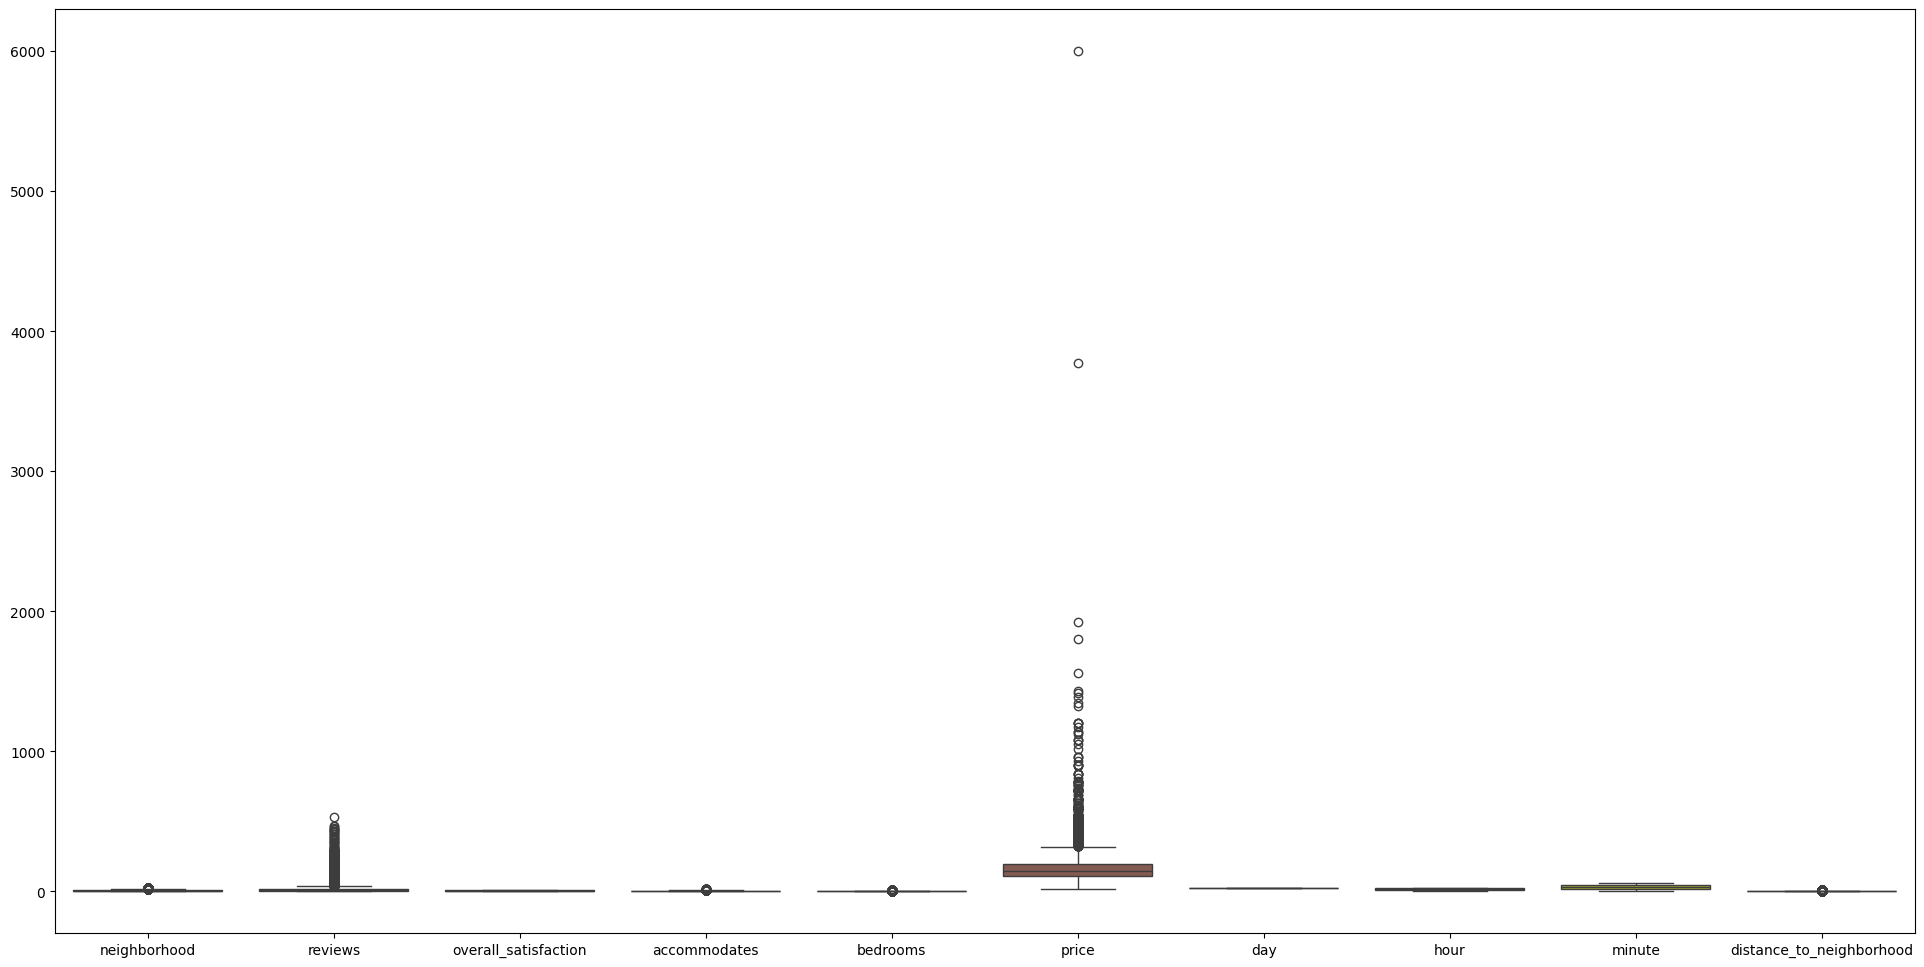

In [15]:
plt.figure(figsize= (24,12))
sns.boxplot(air_data)
plt.show()

In [16]:
def remove_outliers_and_replace(numeric_col):
    Q1 = numeric_col.quantile(0.25)
    Q3 = numeric_col.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for detecting outliers
    lower_value = Q1 - 1.5 * IQR
    upper_value = Q3 + 1.5 * IQR

    # Create a mask for outliers in each column
    outlier_mask = (numeric_col < lower_value) | (numeric_col > upper_value)

    # Replace outliers with the column's median for each column
    for column in numeric_col.columns:
        median_value = numeric_col[column].mean()
        numeric_col[column] = np.where(numeric_col[column] < lower_value[column], median_value, numeric_col[column])
        numeric_col[column] = np.where(numeric_col[column] > upper_value[column], median_value, numeric_col[column])
    
    return numeric_col  # Return the modified DataFrame

# Step 1: Remove outliers and replace them with the median
cleaned_numeric_col_once = remove_outliers_and_replace(numeric_col.copy())

# Step 2: Remove outliers again if necessary
# cleaned_numeric_col_twice = remove_outliers_and_replace(cleaned_numeric_col_once.copy())
# cleaned_numeric_col_thrice = remove_outliers_and_replace(cleaned_numeric_col_twice.copy())
# cleaned_numeric_col_four = remove_outliers_and_replace(cleaned_numeric_col_thrice.copy())
# cleaned5 = remove_outliers_and_replace(cleaned_numeric_col_four.copy())

In [17]:
Q1 = cleaned_numeric_col_once.quantile(0.25)
Q3 = cleaned_numeric_col_once.quantile(0.75)
IQR = Q3 - Q1
outliers = cleaned_numeric_col_once[((cleaned_numeric_col_once < (Q1 - 1.5 * IQR)) | (cleaned_numeric_col_once > (Q3 + 1.5 * IQR)))]

In [18]:
outliers.count()

neighborhood                657
reviews                      66
overall_satisfaction          0
accommodates                  0
bedrooms                      0
price                       549
day                           0
hour                          0
minute                        0
distance_to_neighborhood    388
dtype: int64

In [19]:
air_data['room_type'].value_counts()

room_type
Entire home/apt    14978
Private room        3682
Shared room           63
Name: count, dtype: int64

In [20]:
room_type = pd.get_dummies(air_data['room_type'],dtype = int , drop_first = True)
room_type

,Private room,Shared room
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
18718,1,0
18719,1,0
18720,1,0
18721,1,0


In [21]:
Air_df = pd.concat([cleaned_numeric_col_once , room_type] , axis = 1)
Air_df

,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,day,hour,minute,distance_to_neighborhood,Private room,Shared room
0,1.000000,7.000000,4.5,2.0,1.0,156.0,23.0,13.0,6.0,0.576039,0,1
1,2.000000,16.741548,4.5,4.0,1.0,126.0,23.0,13.0,6.0,2.080930,0,1
2,9.000000,1.000000,0.0,3.0,1.0,132.0,23.0,13.0,6.0,1.083292,0,1
3,2.000000,7.000000,5.0,4.0,1.0,121.0,23.0,13.0,6.0,1.651475,0,1
4,0.000000,1.000000,0.0,2.0,1.0,93.0,23.0,13.0,6.0,0.293463,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18718,4.645623,10.000000,5.0,3.0,1.0,32.0,22.0,16.0,5.0,1.680165,1,0
18719,4.645623,6.000000,5.0,4.0,1.0,24.0,22.0,16.0,5.0,1.583318,1,0
18720,16.000000,0.000000,0.0,1.0,1.0,38.0,22.0,16.0,5.0,2.667954,1,0
18721,2.000000,13.000000,4.5,2.0,1.0,36.0,22.0,16.0,5.0,1.775212,1,0


In [22]:
# num_col = Air_df.select_dtypes(include = ['number'])
Q1 = Air_df.quantile(0.25)
Q3 = Air_df.quantile(0.75)
IQR = Q3 - Q1
Air_df11_outliers = Air_df[((Air_df < (Q1 - 1.5 * IQR)) | (Air_df > (Q3 + 1.5 * IQR)))]

In [23]:
Air_df11_outliers.count()

neighborhood                 657
reviews                       66
overall_satisfaction           0
accommodates                   0
bedrooms                       0
price                        549
day                            0
hour                           0
minute                         0
distance_to_neighborhood     388
Private room                3682
Shared room                   63
dtype: int64

In [24]:
skewness = Air_df.skew()
skewness

neighborhood                 1.013887
reviews                      1.049793
overall_satisfaction        -0.792702
accommodates                 0.845311
bedrooms                     0.699828
price                        0.698698
day                          1.044233
hour                        -0.795312
minute                       0.192475
distance_to_neighborhood     0.764378
Private room                 1.526492
Shared room                 17.153454
dtype: float64

<Axes: >

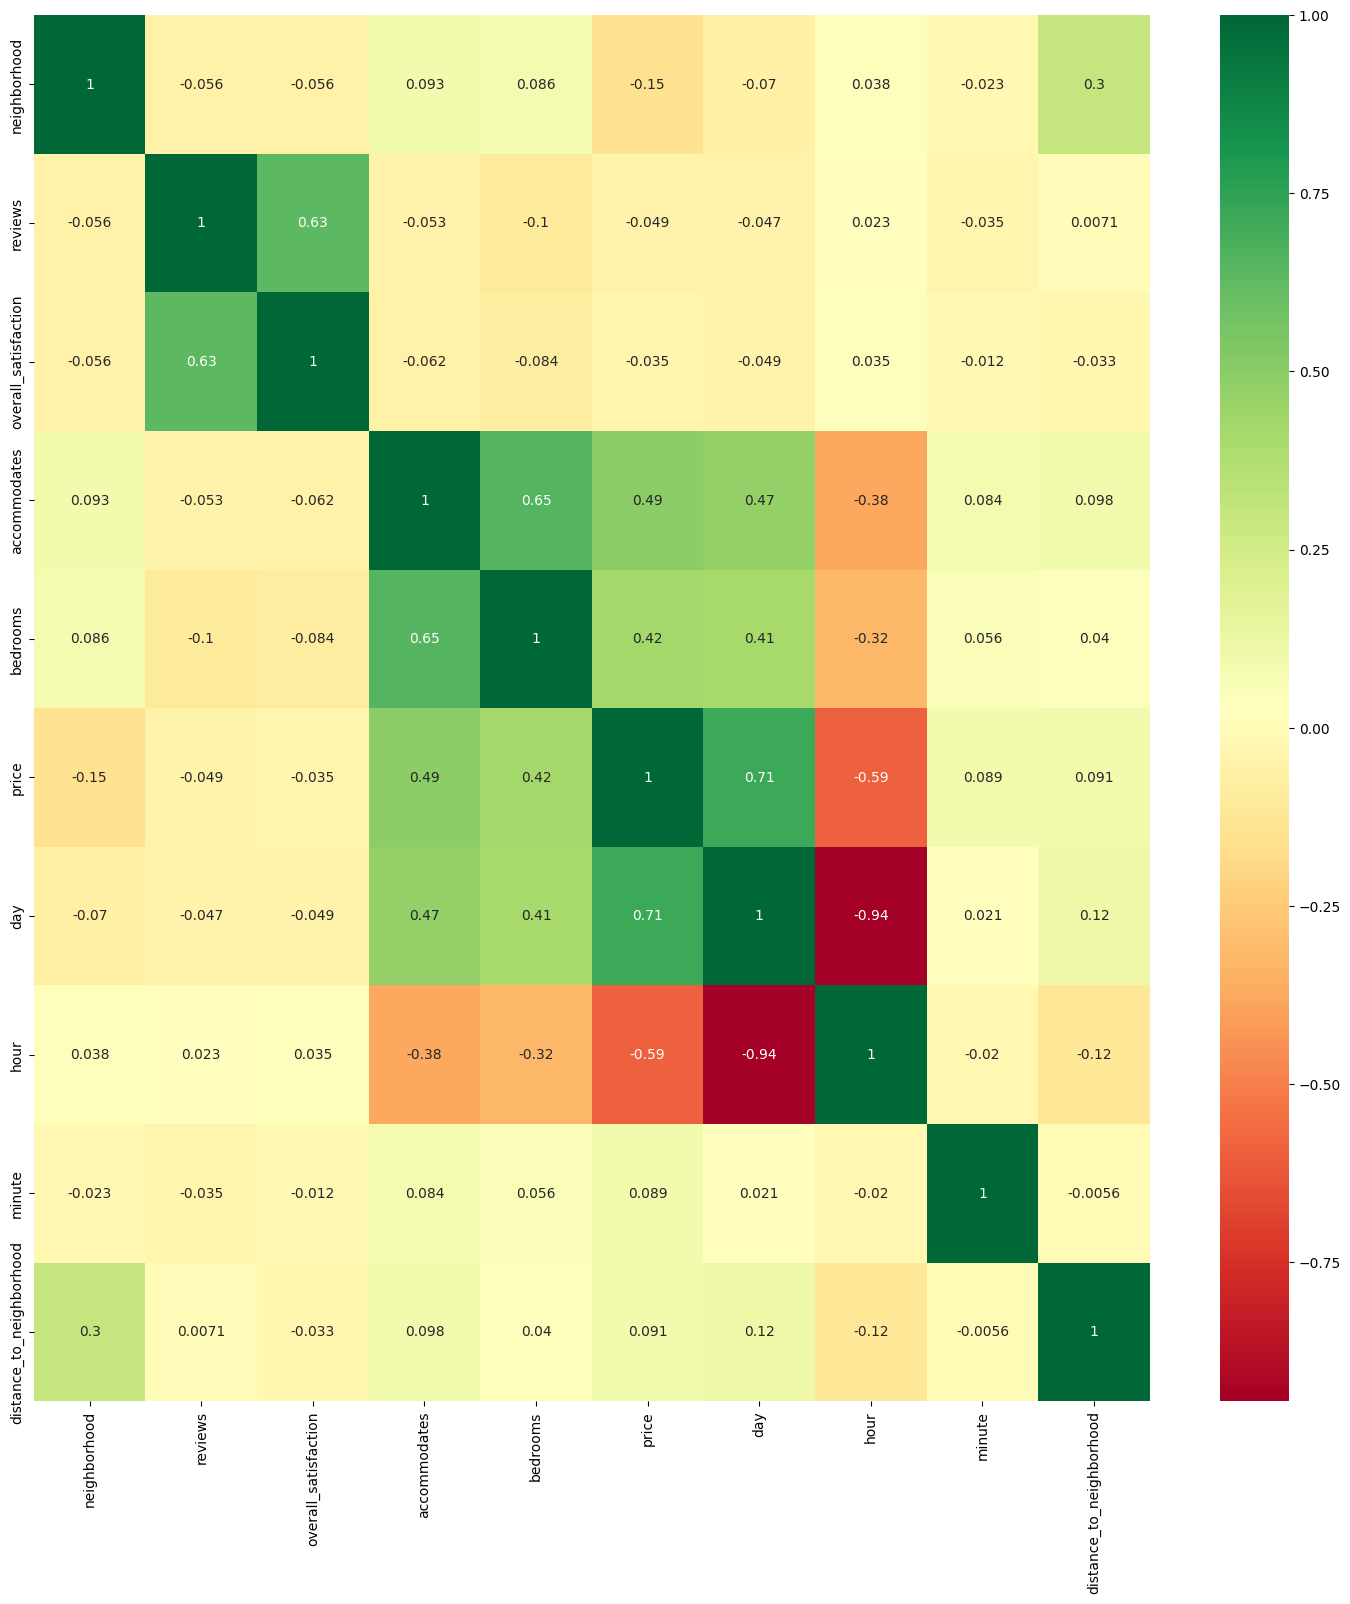

In [25]:
plt.figure(figsize=(18,18))
sns.heatmap(cleaned_numeric_col_once.corr(),annot= True , cmap = 'RdYlGn')

In [26]:
X = Air_df.drop(columns = ['price'], axis = 1)
y = Air_df['price']

In [27]:
X_train , X_test , y_train , y_test = train_test_split (X , y ,random_state = 42 , test_size = 0.3)

In [28]:
tree = ExtraTreesRegressor()
tree.fit(X , y)

ExtraTreesRegressor()

In [29]:
print(tree.feature_importances_)

[0.01543296 0.01762611 0.00700389 0.014316   0.0107993  0.23142819
 0.51336934 0.12946775 0.02409537 0.02823778 0.00822332]


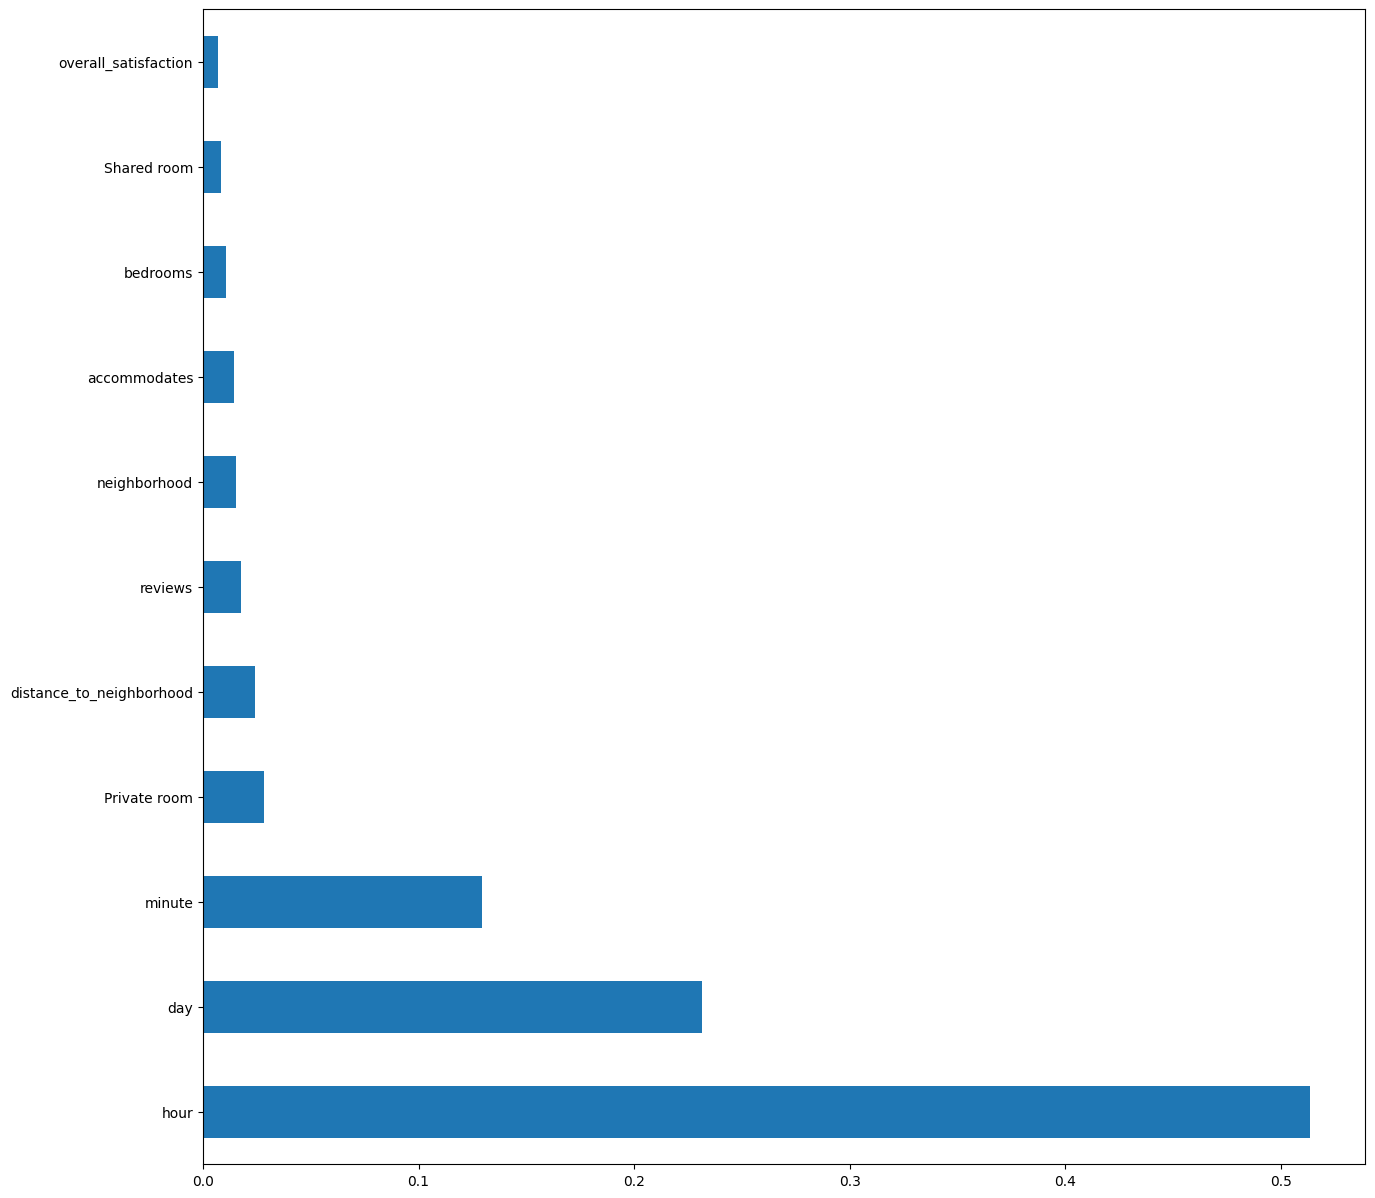

In [30]:
plt.figure(figsize=(15,15))
feature_imp = pd.Series(tree.feature_importances_ , index = X.columns)
feature_imp.nlargest(30).plot(kind = 'barh')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
import pickle 
pickle.dump(scaler,open('scaling.pkl','wb'))

In [33]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train , y_train)

RandomForestRegressor()

In [34]:
y_pred = reg_rf.predict(X_test)

In [35]:
reg_rf.score(X_train , y_train)

0.9859204278685486

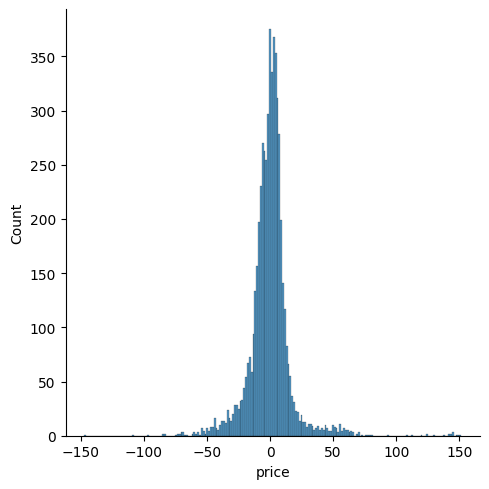

In [36]:
sns.displot(y_test-y_pred)
plt.show()

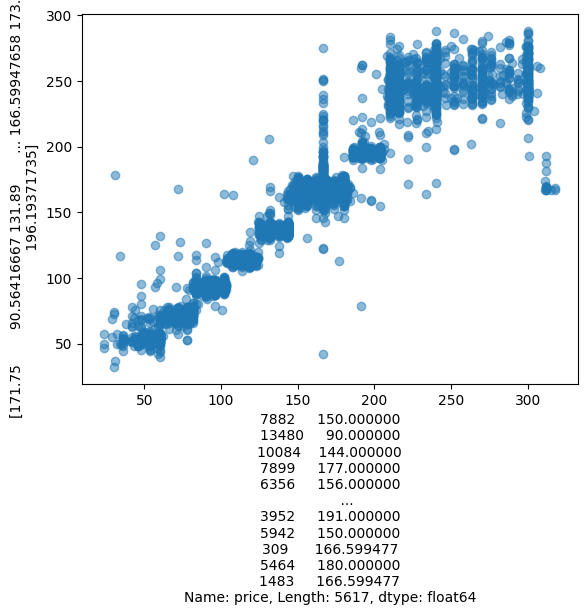

In [37]:
plt.scatter(y_test, y_pred , alpha = 0.5)
plt.xlabel(y_test)
plt.ylabel(y_pred)
plt.show()

In [38]:
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',root_mean_squared_error(y_test,y_pred))
print('R2:',r2_score(y_test,y_pred))


MAE: 10.546770636668102
MSE: 302.3397018592896
RMSE: 17.387918272734364
R2: 0.9054522388863531


In [39]:
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200 , num = 12)]

max_features = ['log2','sqrt']

max_depth = [int(x) for x in np.linspace( 5 , 30 , num = 6)]

min_sample_split = [2,5,10,15,100]

min_sample_leaf = [1,2,5,10]

In [40]:
random_grid = {'n_estimators':n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_sample_split,
               'min_samples_leaf': min_sample_leaf}

In [41]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions= random_grid , scoring = 'neg_mean_squared_error', cv = 5, n_iter = 10 ,verbose = 2, random_state = 42 , n_jobs = 1)

In [42]:
rf_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  35.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  24.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  27.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [44]:
prediction = rf_random.predict(X_test)

<Figure size 800x800 with 0 Axes>

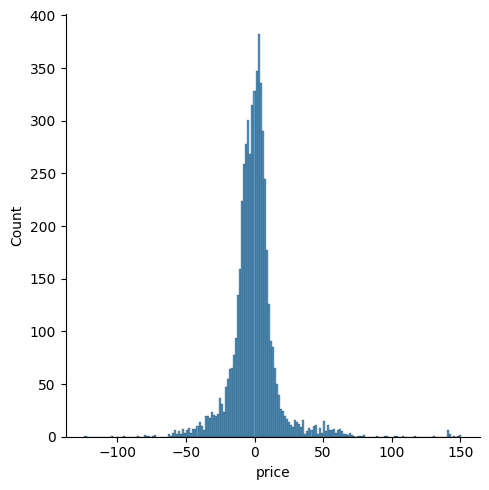

In [45]:
plt.figure(figsize=(8,8))
sns.displot(y_test-prediction)
plt.show()

<Figure size 800x800 with 0 Axes>

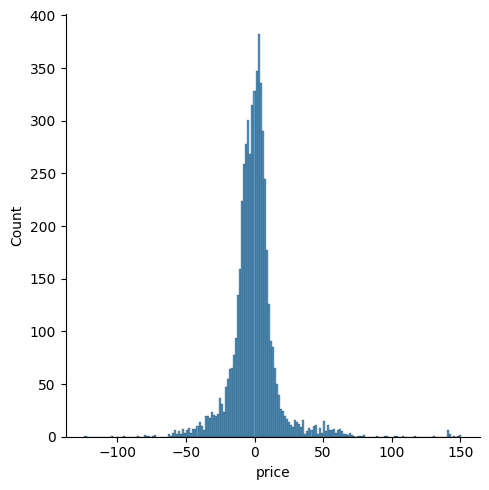

In [46]:
plt.figure(figsize=(8,8))
sns.displot(y_test-prediction)
plt.show()

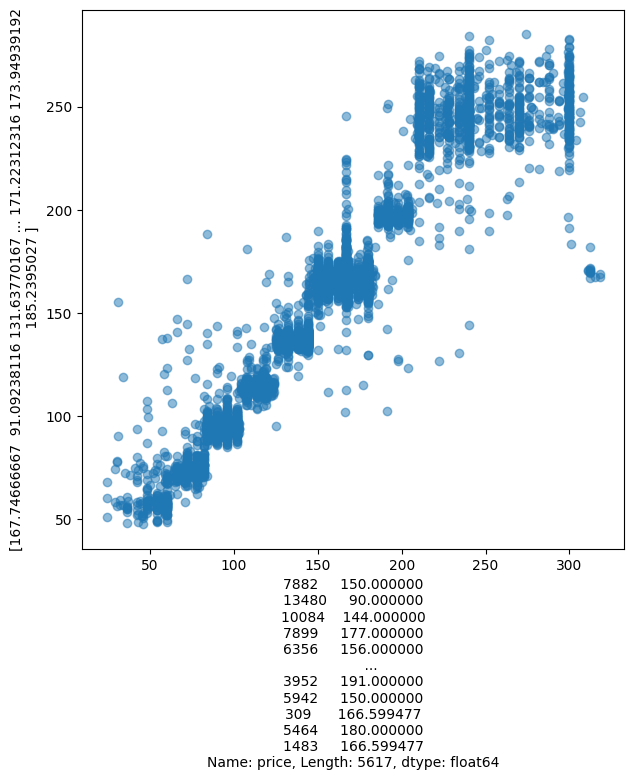

In [47]:
plt.figure(figsize = (7,7))
plt.scatter(y_test , prediction , alpha = 0.5)
plt.xlabel (y_test)
plt.ylabel(prediction)
plt.show()

In [48]:
print('MAE:',mean_absolute_error(y_test,prediction))
print('MSE:',mean_squared_error(y_test,prediction))
print('RMSE:',root_mean_squared_error(y_test,prediction))
print('R2:',r2_score(y_test,prediction))


MAE: 10.804802832606443
MSE: 316.71284250368876
RMSE: 17.79642780177215
R2: 0.9009574660869409


In [58]:
import pickle
# open a file , where you want ot store the data
file = open('airbnb.pkl','wb')

# dump information to that file 
pickle.dump(rf_random , file)

In [59]:
model = open('airbnb.pkl', 'rb')
forest = pickle.load(model)

In [60]:
y_prediction = forest.predict(X_test)
y_prediction

array([167.74666667,  91.09238116, 131.63770167, ..., 171.22312316,
       173.94939192, 185.2395027 ])

In [64]:
r2_score(y_test , y_prediction)

0.9009574660869409